<a href="https://colab.research.google.com/github/shahisha/End-to-End-Deep-Learning/blob/main/DigitRecognition_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import cv2
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential , load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

11490434/11490434 [==============================] - 0s 0us/step


<ipython-input-2-8278da15a130>:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,2,i+1)


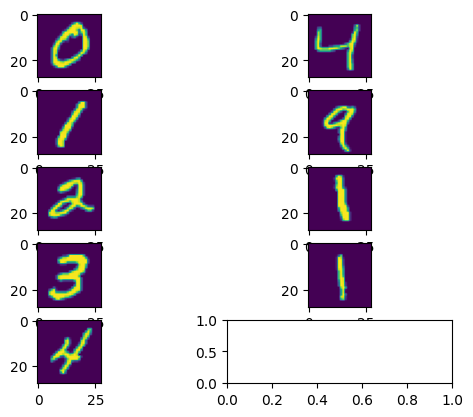

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train= x_train.reshape(60000,28,28)

x_test= x_test.reshape(x_test.shape[0],28,28)

input_shape=(28,28,1)

y_train=keras.utils.to_categorical(y_train,10)

y_test=keras.utils.to_categorical(y_test,10)

x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

for i in range(10):
  plt.imshow(x_train[i])
  plt.subplot(5,2,i+1)

In [3]:
x_train /= 255
x_test /=255

batch_size=64
num_classes=10
epochs=5

def build_model(optimizer):
    model=Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=optimizer,metrics='accuracy')
    model.summary()

    return model


optimizer = ['Adam','Adagrad']

for i in optimizer:
	model = build_model(i)

plot_model(model, to_file="mnist model"+ '.jpg', show_shapes=True)
hist=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0         
                                                                 
 flatten (Flatten)           (None, 800)               0

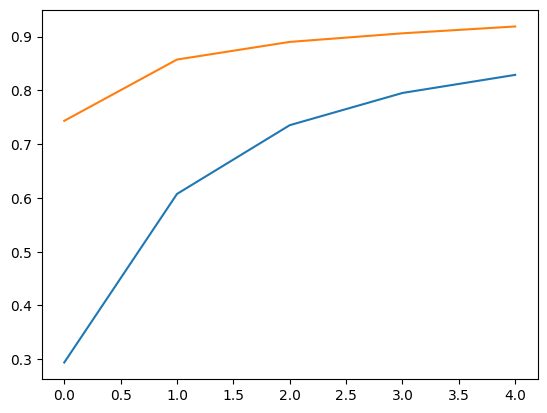

In [4]:
y1=hist.history['accuracy']
y2=hist.history['val_accuracy']
plt.plot(y1)
plt.plot(y2)

<ipython-input-5-846a4606566b>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  keras.models.save_model(model, "mnist.h5", save_format="h5")


1/1 [==============================] - 0s 134ms/step
[[0.00057039 0.00134249 0.00675362 0.05226535 0.17485048 0.18686624
  0.02459562 0.011096   0.04621617 0.49544358]]
9


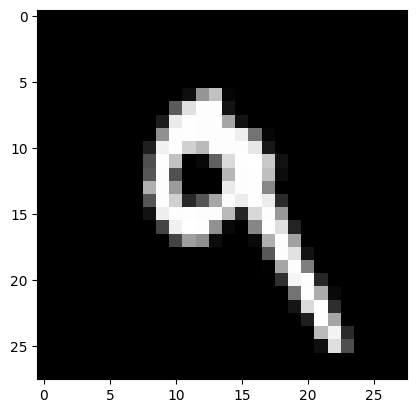

In [5]:
keras.models.save_model(model, "mnist.h5", save_format="h5")

def predict_image(model, img):
  # img = cv2.resize(img, (28,28,1))
  img = np.reshape(img,(1, 28, 28))
  pred = model.predict(img)
  img = img.astype('float32')
  img /=255
  print(pred)
  answer = np.argmax(pred)
  print(answer)

m = load_model('/content/mnist.h5')
predict_image(m, x_test[7])
plt.imshow(x_test[7],cmap='gray')
